In [7]:
from sdv import load_demo

In [8]:
metadata, tables = load_demo(metadata=True)

In [9]:
metadata.to_dict()

{'tables': {'users': {'primary_key': 'user_id',
   'fields': {'user_id': {'type': 'id', 'subtype': 'integer'},
    'country': {'type': 'categorical'},
    'gender': {'type': 'categorical'},
    'age': {'type': 'numerical', 'subtype': 'integer'}}},
  'sessions': {'primary_key': 'session_id',
   'fields': {'session_id': {'type': 'id', 'subtype': 'integer'},
    'user_id': {'ref': {'field': 'user_id', 'table': 'users'},
     'type': 'id',
     'subtype': 'integer'},
    'device': {'type': 'categorical'},
    'os': {'type': 'categorical'}}},
  'transactions': {'primary_key': 'transaction_id',
   'fields': {'transaction_id': {'type': 'id', 'subtype': 'integer'},
    'session_id': {'ref': {'field': 'session_id', 'table': 'sessions'},
     'type': 'id',
     'subtype': 'integer'},
    'timestamp': {'type': 'datetime', 'format': '%Y-%m-%d'},
    'amount': {'type': 'numerical', 'subtype': 'float'},
    'approved': {'type': 'boolean'}}}}}

In [10]:
tables

{'users':    user_id country gender  age
 0        0     USA      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4     USA      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os
 0           0        0  mobile  android
 1           1        1  tablet      ios
 2           2        1  tablet  android
 3           3        2  mobile  android
 4           4        4  mobile      ios
 5           5        5  mobile  android
 6           6        6  mobile      ios
 7           7        6  tablet      ios
 8           8        6  mobile      ios
 9           9        8  tablet      ios,
 'transactions':    transaction_id  session_id           timestamp  amount  approved
 0               0           0 2019-01-01 12:34:32   100.0      True
 1               1  

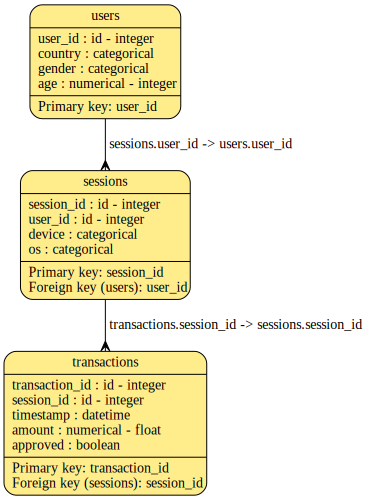

In [11]:
metadata.visualize()

In [14]:
from sdv import SDV

sdv = SDV()
sdv.fit(metadata, tables)

2020-06-25 16:03:03,773 - INFO - modeler - Modeling users
2020-06-25 16:03:03,778 - INFO - modeler - Modeling sessions
2020-06-25 16:03:03,783 - INFO - modeler - Modeling transactions
2020-06-25 16:03:03,791 - INFO - gaussian - Fitting GaussianMultivariate(distribution="GaussianUnivariate")
2020-06-25 16:03:03,803 - INFO - gaussian - Fitting GaussianMultivariate(distribution="GaussianUnivariate")
2020-06-25 16:03:03,812 - INFO - gaussian - Fitting GaussianMultivariate(distribution="GaussianUnivariate")
2020-06-25 16:03:03,819 - INFO - gaussian - Fitting GaussianMultivariate(distribution="GaussianUnivariate")
2020-06-25 16:03:03,825 - INFO - gaussian - Fitting GaussianMultivariate(distribution="GaussianUnivariate")
2020-06-25 16:03:03,834 - INFO - gaussian - Fitting GaussianMultivariate(distribution="GaussianUnivariate")
2020-06-25 16:03:03,840 - INFO - gaussian - Fitting GaussianMultivariate(distribution="GaussianUnivariate")
2020-06-25 16:03:03,845 - INFO - gaussian - Fitting Gaussian

In [16]:
sdv.sample_all(10)

> /home/xals/Projects/MIT/SDV/sdv/models/copulas.py(102)_prepare_sampled_covariance()
    101         import ipdb; ipdb.set_trace()
--> 102         covariance = np.array(square_matrix(covariance))
    103         covariance = (covariance + covariance.T - (np.identity(covariance.shape[0]) * covariance))

ipdb> covariance
[[1.726615061615442], [1.0454201815611962e-17, 0.8202611657476363], [0.906087951592798, 0.0, 0.9063498818810053], [0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0,

ipdb> ll
     90     def _prepare_sampled_covariance(self, covariance):
     91         """Prepare a covariance matrix.
     92 
     93         Args:
     94             covariance (list):
     95                 covariance after unflattening model parameters.
     96 
     97         Result:
     98             list[list]:
     99                 symmetric Positive semi-definite matrix.
    100         """
    101         import ipdb; ipdb.set_trace()
    102         covariance = np.array(square_matrix(covariance))
--> 103         covariance = (covariance + covariance.T - (np.identity(covariance.shape[0]) * covariance))
    104 
    105         if not check_matrix_symmetric_positive_definite(covariance):
    106             covariance = make_positive_definite(covariance)
    107 
    108         return covariance.tolist()
    109 

ipdb> n
> /home/xals/Projects/MIT/SDV/sdv/models/copulas.py(105)_prepare_sampled_covariance()
    104 
--> 105         if not check_matrix_symmetric_posit

ipdb> c
> /home/xals/Projects/MIT/SDV/sdv/models/copulas.py(102)_prepare_sampled_covariance()
    101         import ipdb; ipdb.set_trace()
--> 102         covariance = np.array(square_matrix(covariance))
    103         covariance = (covariance + covariance.T - (np.identity(covariance.shape[0]) * covariance))

ipdb> covariance
[[1.7798122161501428], [8.418645096312187e-18, 0.6606961152453757], [1.1193765416016843, 0.0, 1.119151425141485], [0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1920928955078125e-07], [0.0, 0

BdbQuit: 